# AIR QUALITY FORECAST: MACHINE LEARNING MODEL

Air Quality has a significant <br>
primary goal <br>
bussiness problem you are trying to use<br>



In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('air quality data.csv')

# ANALYZING THE DATASET

In [6]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [7]:
df.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0
29530,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0


In [8]:
df.head(10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
5,Ahmedabad,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN
6,Ahmedabad,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN
7,Ahmedabad,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN
8,Ahmedabad,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN
9,Ahmedabad,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN


In [9]:
df.shape

(29531, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [11]:
df.isnull().sum()

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [12]:
df.isnull().sum().sum()

83807

In [13]:
df.duplicated().sum() # 

2297

In [14]:
df1 = df.dropna(subset=['AQI'],inplace=True) #drop rows where the AQI column has  missing value

In [15]:
df.isnull().sum().sort_values(ascending=False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [16]:
df.shape

(24850, 14)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [18]:
null_values_percentage =(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [19]:
null_values_percentage


Xylene     61.859155
PM10       28.515091
NH3        26.301811
Toluene    23.444668
Benzene    14.225352
NOx         7.472837
O3          3.247485
PM2.5       2.728370
SO2         2.434608
CO          1.790744
NO2         1.573441
NO          1.557344
City        0.000000
AQI         0.000000
dtype: float64

# COMMENT
<br>Xylene has the highest percentage of missing values os we decided to impute these values

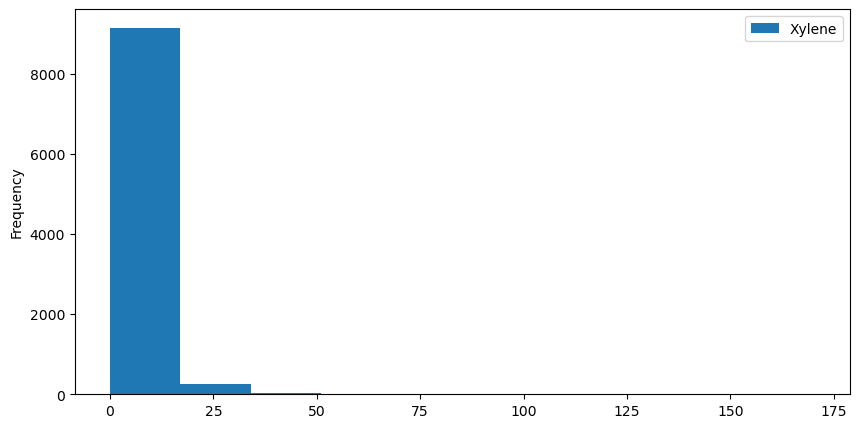

In [21]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

In [22]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

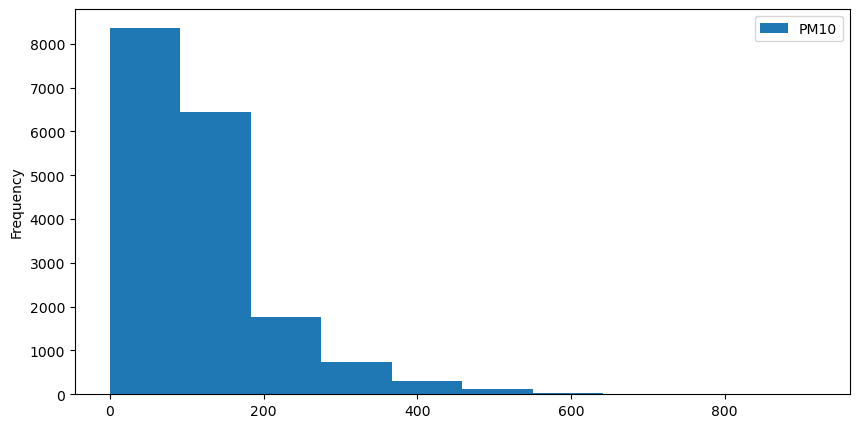

In [23]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

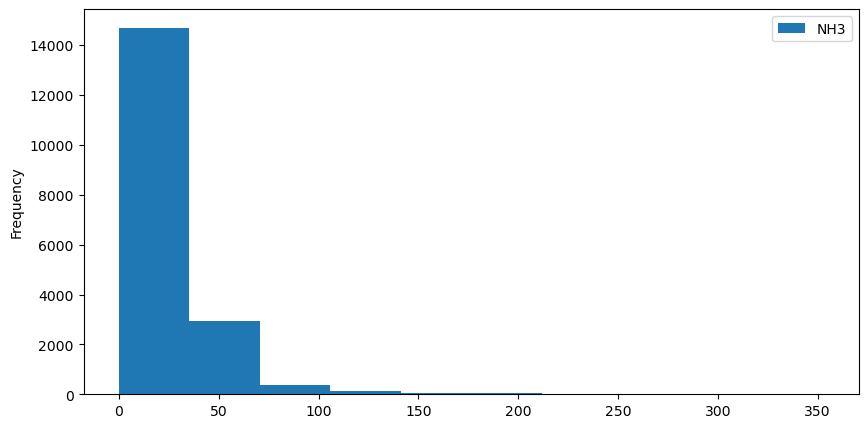

In [24]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

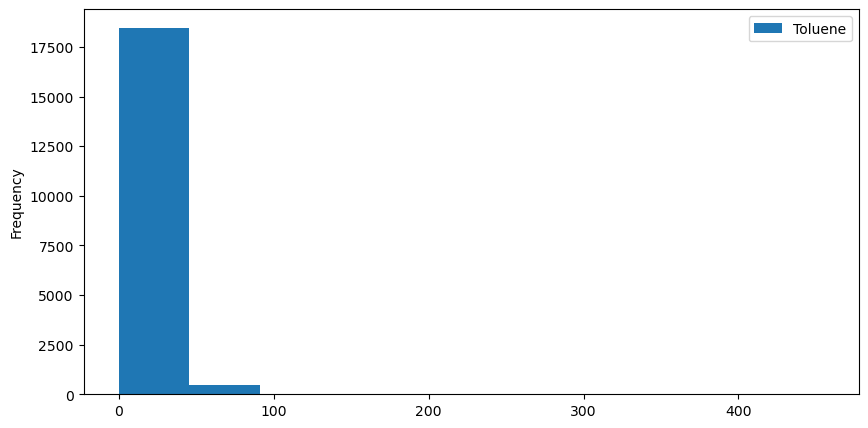

In [25]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

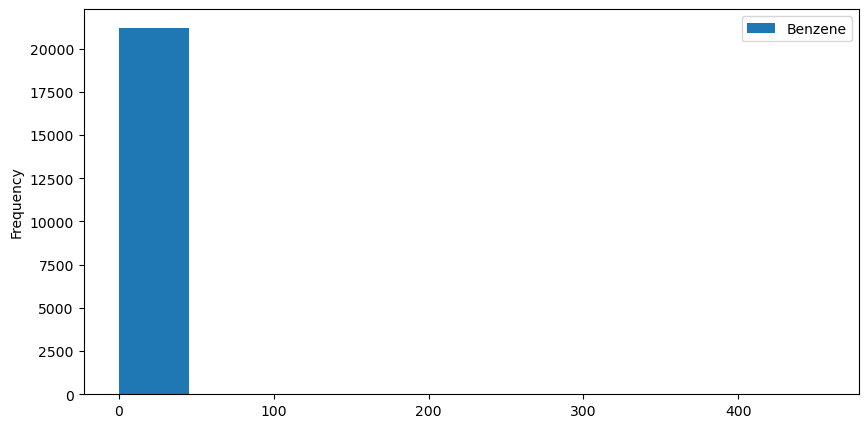

In [26]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

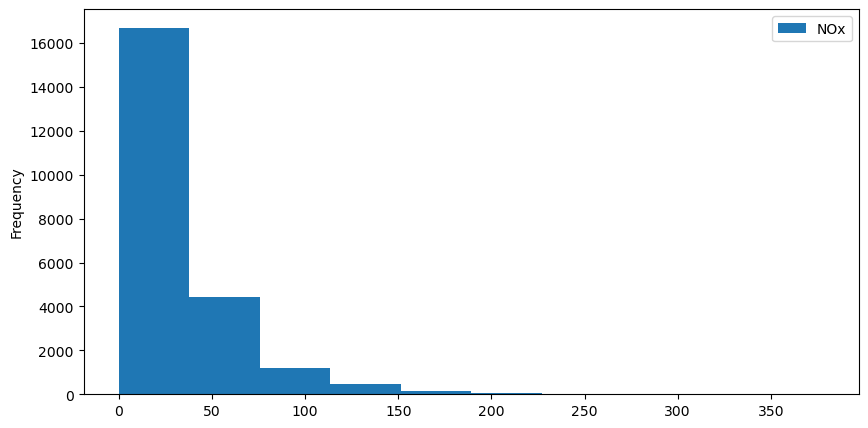

In [27]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

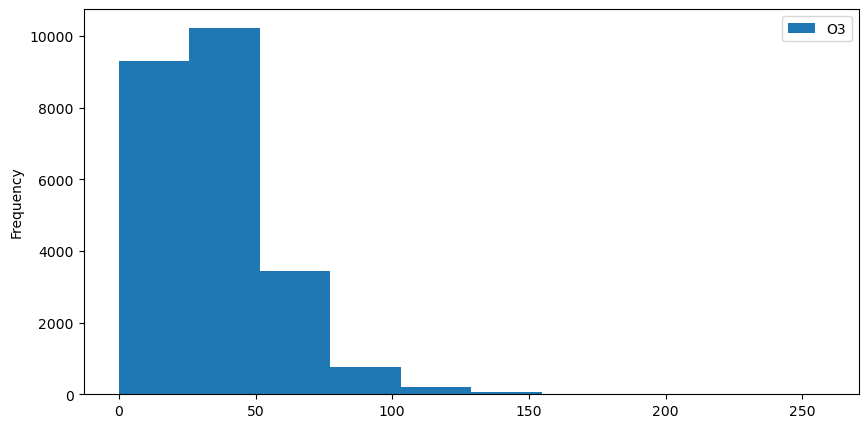

In [28]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

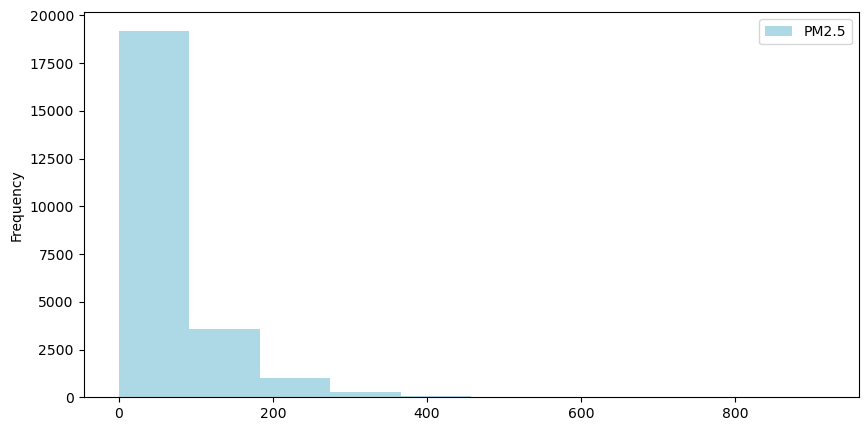

In [29]:
df['PM2.5'].plot(kind='hist',figsize=(10,5),color='lightblue')
plt.legend()
plt.show()

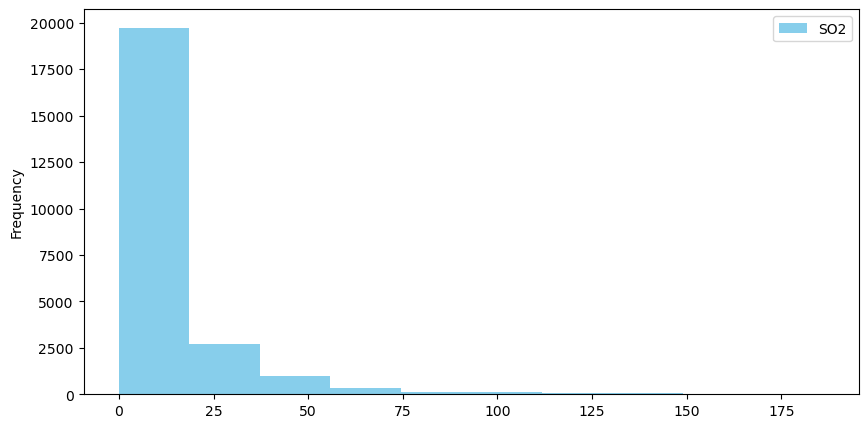

In [30]:
df['SO2'].plot(kind='hist',figsize=(10,5),color='skyblue')
plt.legend()
plt.show()

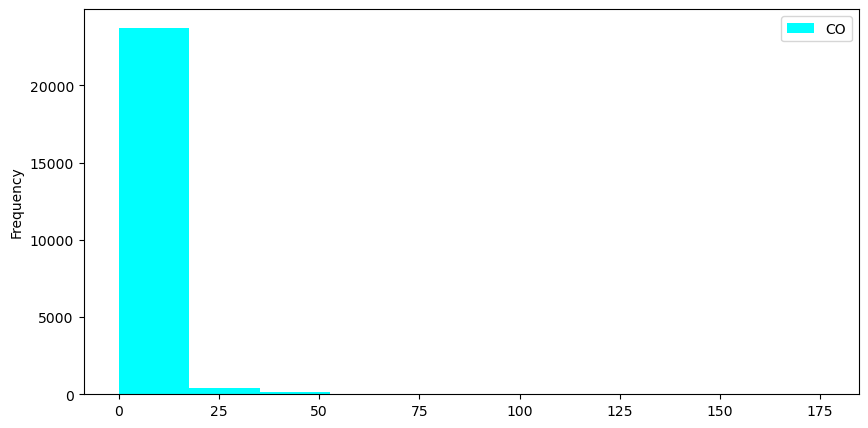

In [31]:
df['CO'].plot(kind='hist',figsize=(10,5),color='cyan')
plt.legend()
plt.show()

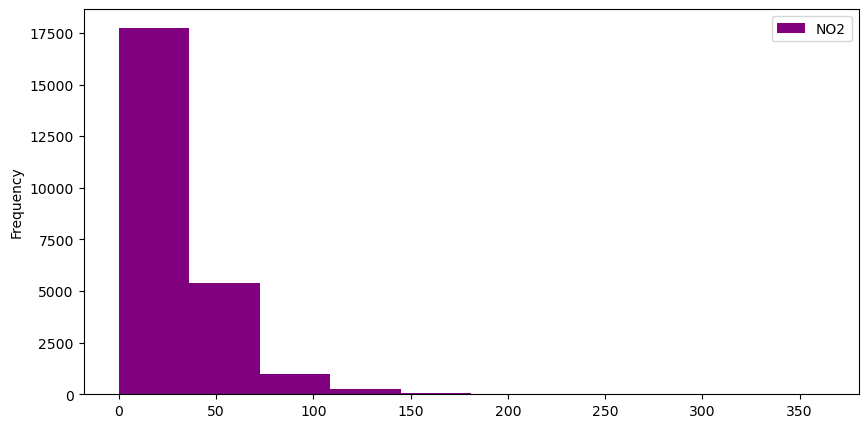

In [32]:
df['NO2'].plot(kind='hist',figsize=(10,5),color='purple')
plt.legend()
plt.show()

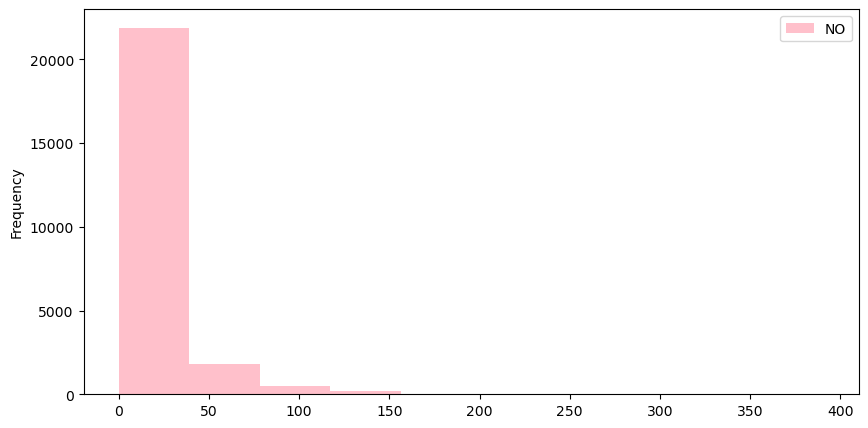

In [33]:
df['NO'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

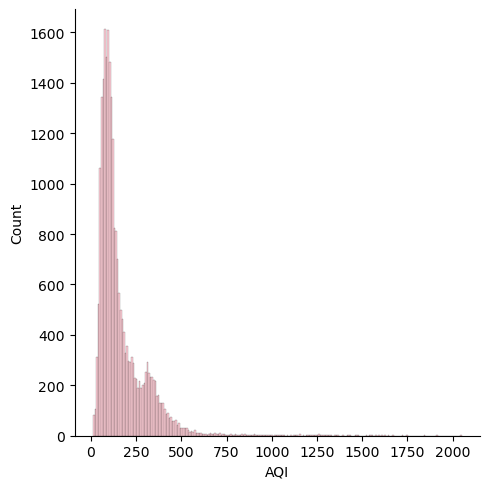

In [34]:
sns.displot(df,x="AQI",color="pink")
plt.show()

# bivariate analysis

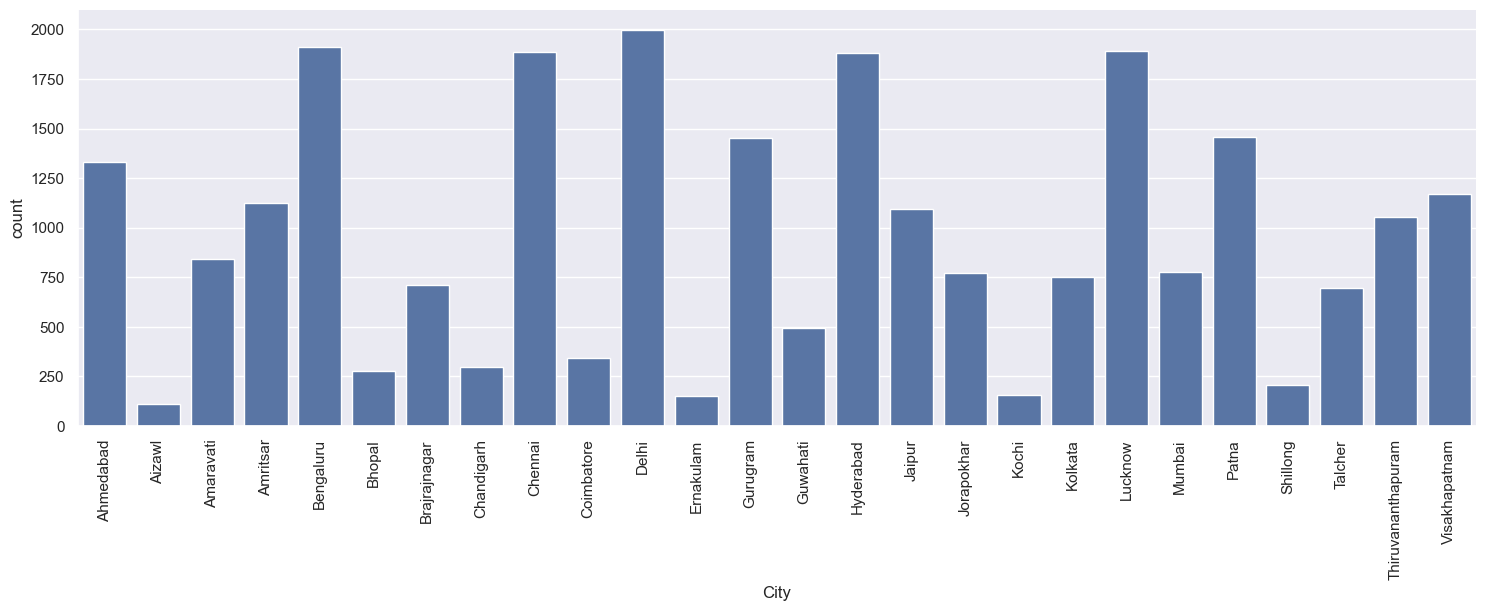

In [36]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City", kind="count",data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

In [37]:
df.describe().loc["std"]

PM2.5       63.075398
PM10        89.487976
NO          22.421138
NO2         24.627054
NOx         30.712855
NH3         25.875981
CO           7.075208
SO2         17.428693
O3          21.724525
Benzene     16.036020
Toluene     20.881085
Xylene       6.754324
AQI        140.696585
Name: std, dtype: float64

In [38]:
df.describe().loc["mean"]

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [39]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [40]:
df = df.replace({
    "PM2.5" : {np.nan:67.476613},
    "PM10" : {np.nan:118.454435},
    "NO" : {np.nan:17.622421},
    "NO2" : {np.nan:28.978391},
    "NOx" : {np.nan:32.289012},
    "NH3" : {np.nan:23.848366},
    "CO" : {np.nan:2.345267},
    "SO2" : {np.nan:14.362933},
    "O3" : {np.nan:34.912885},
    "Benzene" : {np.nan:3.458668},
    "Toluene" : {np.nan:9.525714},
    "Xylene" : {np.nan:3.588683},
    "AQI" : {np.nan:166.463581},
})

In [41]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

<Axes: >

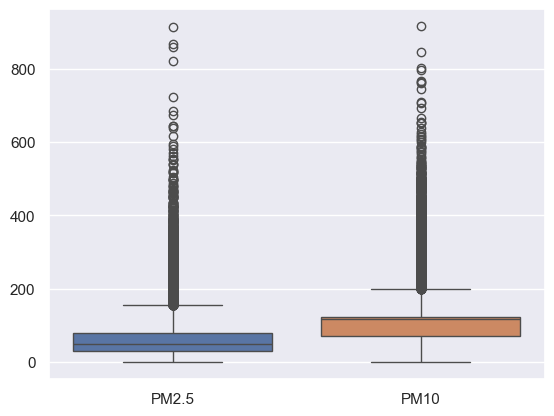

In [42]:
#detect outiers
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

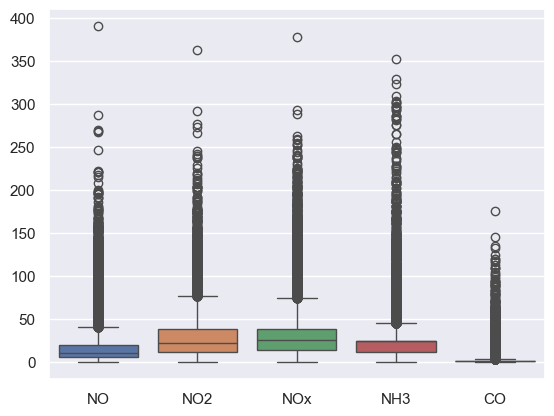

In [43]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3','CO']])

<Axes: >

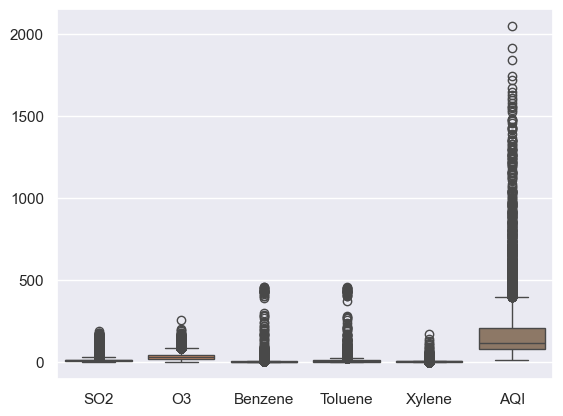

In [44]:
sns.boxplot(data=df[['SO2','O3','Benzene','Toluene','Xylene','AQI']])

<Axes: >

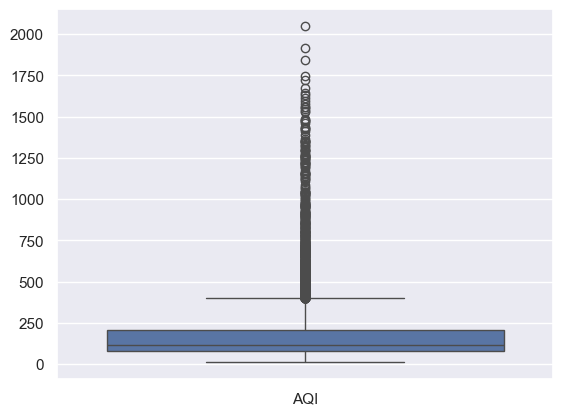

In [45]:
sns.boxplot(data=df[['AQI']])


In [46]:
# #inter_quartile method[IQR]

# def replace_outliers_with_quartiles(df):
#     for column in df.select(include=['number']).columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1

#         # To identify outliers, Lower and upper Limits are calculated and values outs

#         lower_bound = Q1 - 1.5 * IQR
    
#         upper_bound = Q3 + 1.5 * IQR
#         # For each column, we identify outliers and replace them with Q1 or Q3. We do

#         #If the value is less than the Lower bound, it is replaced with Q1. If it is g

#         #it is replaced with Q3. In the last case, the value is not changed and remains

#         df[column] = df[column].apply(

#         lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
#         )
#         return df

# df = replace_outliers_with_quartiles(df)

In [47]:
def replace_outliers_with_quartiles(df):
  for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
# To identify outliers, Lower and upper Limits are calculated and values outs
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# For each column, we identify outliers and replace them with Q1 or Q3. We do
#If the value is less than the Lower bound, it is replaced with Q1. If it is g
#it is replaced with Q3. In the last case, the value is not changed and remains
    df[column] = df[column].apply(
    lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
  )
  return df
df = replace_outliers_with_quartiles(df)

<Axes: >

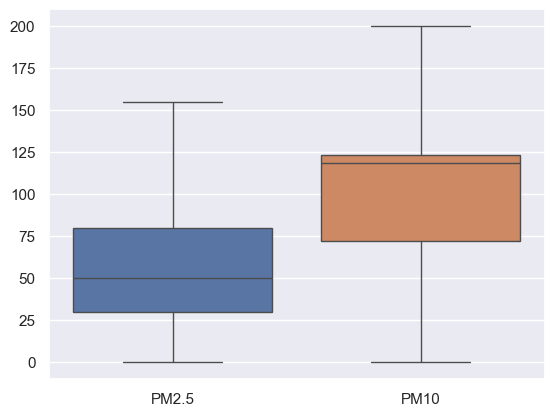

In [93]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

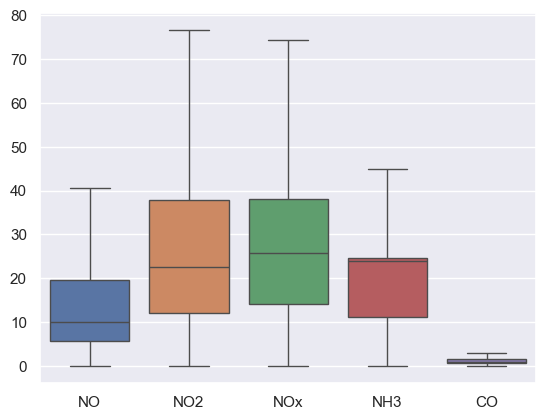

In [95]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3','CO']])

<Axes: >

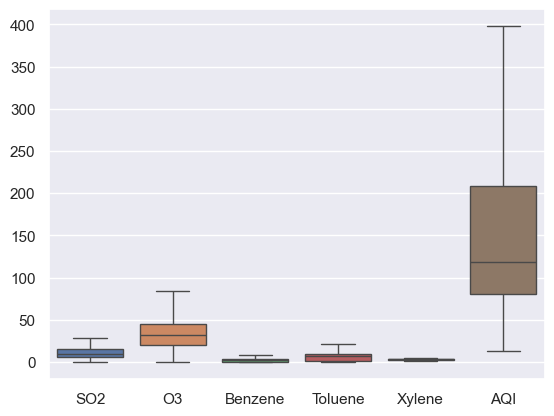

In [97]:
sns.boxplot(data=df[['SO2','O3','Benzene','Toluene','Xylene','AQI']])

<Axes: >

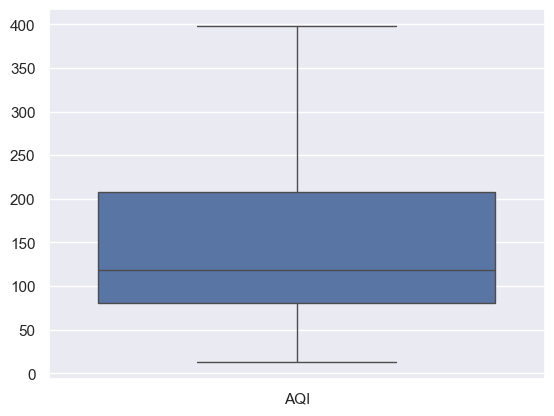

In [99]:
sns.boxplot(data=df[['AQI']])


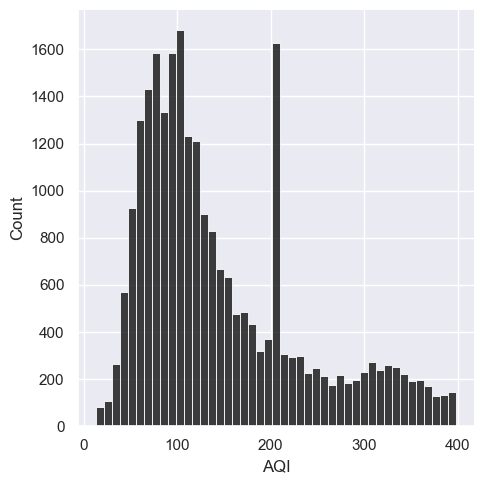

In [105]:
sns.displot(df, x='AQI', color="black")
plt.show()

In [107]:
df1=df.drop(columns=['City']) #dropping city column

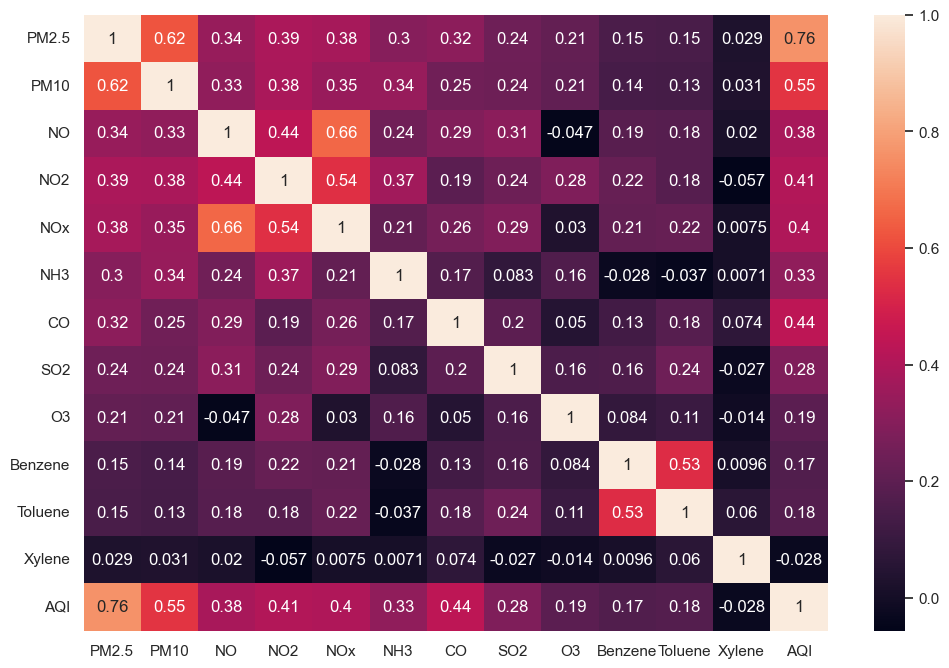

In [109]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [111]:
df.drop(['City'],axis=1,inplace=True) #dropping uneccesasry columns

In [113]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


# data modeling

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [124]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [126]:
x= df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y=df['AQI']

In [128]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683


In [130]:
y.head()

28    209.0
29    328.0
30    208.0
31    208.0
32    208.0
Name: AQI, dtype: float64

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=70)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(19880, 12) (4970, 12) (19880,) (4970,)


In [146]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [152]:
#predicting train
train_pred=model.predict(X_train)
#predicting test
test_pred=model.predict(X_test)

In [158]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train, train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, train_pred)))
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE TestData = ", str(RMSE_test))
print('-'*50)
print("RSquared value on train:", model.score(X_train,Y_train))
print("RSquared value on test:", model.score(X_test,Y_test))

ValueError: Found input variables with inconsistent numbers of samples: [4970, 19880]

In [160]:
RMSE_train=(np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:', model.score(X_train, Y_train))
print('RSquared value on test:', model.score(X_test, Y_test))

RMSE TrainingData =  51.70703411023219
RMSE TestData =  50.98891707971116
--------------------------------------------------
RSquared value on train: 0.6510670631277098
RSquared value on test: 0.6561645891946594


In [164]:
#k-NEAREST NEIGHBOUR

KNN= KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [173]:
RMSE_train=(np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:', model.score(X_train, Y_train))
print('RSquared value on test:', model.score(X_test, Y_test))

RMSE TrainingData =  51.70703411023219
RMSE TestData =  50.98891707971116
--------------------------------------------------
RSquared value on train: 0.6510670631277098
RSquared value on test: 0.6561645891946594


In [175]:
#decision tree
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [177]:
#predicting train
train_pred =  DT.predict(X_train)
test_pred = DT.predict(X_test)

In [191]:
RMSE_train=(np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:', model.score(X_train, Y_train))
print('RSquared value on test:', model.score(X_test, Y_test))

RMSE TrainingData =  2.617779683045854
RMSE TestData =  46.60491342195245
--------------------------------------------------
RSquared value on train: 0.6510670631277098
RSquared value on test: 0.6561645891946594


In [183]:
#rf
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [185]:
train_preds1=RF.predict(X_train)
train_preds1=RF.predict(X_test)

In [187]:
RMSE_train=(np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:', RF.score(X_train, Y_train))
print('RSquared value on test:', RF.score(X_test, Y_test))

RMSE TrainingData =  2.617779683045854
RMSE TestData =  46.60491342195245
--------------------------------------------------
RSquared value on train: 0.9774816861578014
RSquared value on test: 0.8513226121190531
